# Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from mplfinance.original_flavor import candlestick_ohlc
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
def mean_normalization(x):
    max_x = np.max(x)
    min_x = np.min(x)
    mean_x = np.mean(x)
    x = (x - mean_x) / (max_x - min_x)
    x_b = np.c_[np.ones((len(x), 1)), x]
    return x_b, max_x, min_x, mean_x

In [3]:
def stochastic_gradient_descent(x_b, y, n_epochs=50, learning_rate=0.00001):
    n = len(x_b)
    # theta = np.random.randn(4, 1)
    theta = np.array([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas = [theta]
    losses = []

    for _ in range(n_epochs):
        for i in range(n):
            # random_index = np.random.randint(n)
            random_index = i

            xi = x_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            yi_hat = xi.dot(theta)
            loss = (yi_hat - yi) ** 2 / 2
            loss_grad = xi.T.dot(yi_hat - yi)
            theta = theta - learning_rate * loss_grad

            thetas.append(theta)
            losses.append(loss[0][0])

    return thetas, losses

In [4]:
def mini_batch_gradient_descent(x_b, y, n_epochs=50,  minibatch_size=20, learning_rate=0.01):   
    n = len(x_b)
    # theta = np.random.randn(4, 1)
    theta = np.array([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas = [theta]
    losses = []

    for _ in range(n_epochs):
        # shuffled_indices = np.random.permutation(n)
        shuffled_indices = np.array([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])

        x_b_shuffled = x_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, minibatch_size):
            xi = x_b_shuffled[i: i + minibatch_size]
            yi = y_shuffled[i: i + minibatch_size]

            yi_hat = xi.dot(theta)
            loss = (yi_hat - yi) ** 2 / 2
            loss_grad = xi.T.dot(yi_hat - yi)
            theta = theta - learning_rate * loss_grad / xi.shape[0]
            
            thetas.append(theta)
            losses.append(np.sum(loss) / xi.shape[0])

    return thetas, losses

In [5]:
def batch_gradient_descent(x_b, y, n_epochs=100, learning_rate=0.01):
    n = len(x_b)
    # theta = np.random.randn(4, 1)
    theta = np.array([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas = [theta]
    losses = []

    for _ in range(n_epochs):
        yi_hat = x_b.dot(theta)
        loss = (yi_hat - y) ** 2
        loss_grad = x_b.T.dot(2 * (yi_hat - y))
        theta = theta - learning_rate * loss_grad / n
        
        thetas.append(theta)
        losses.append(np.sum(loss) / n)

    return thetas, losses

In [6]:
# dataset
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
x = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalizaton
x_b, max_x, min_x, mean_x = mean_normalization(x)

##### Question 1

6754.64


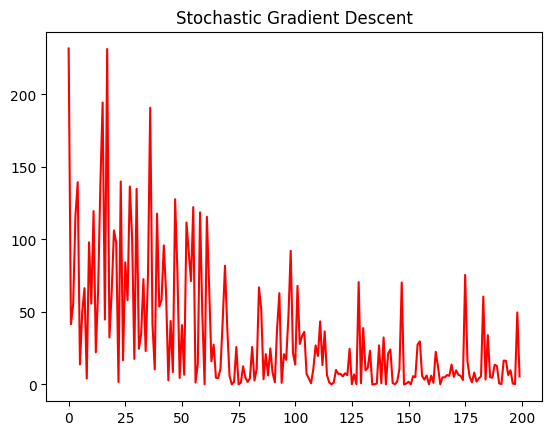

In [7]:
sgd_thetas, sgd_losses = stochastic_gradient_descent(x_b, y, n_epochs=1, learning_rate=0.01)
print(round(np.sum(sgd_losses),2))

plt.plot(range(len(sgd_losses)), sgd_losses, color="r")
plt.title("Stochastic Gradient Descent")
plt.show()

##### Question 2

8865.65


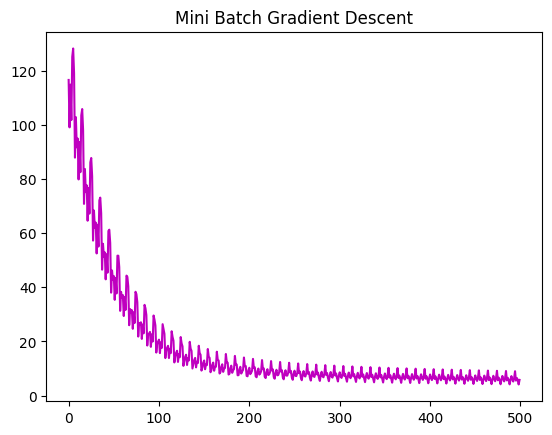

In [8]:
mbgd_thetas, mbgd_losses = mini_batch_gradient_descent(x_b, y, n_epochs=50,  minibatch_size=20, learning_rate=0.01)
print(round(sum(mbgd_losses), 2))

plt.plot(range(len(mbgd_losses)), mbgd_losses, color="m")
plt.title("Mini Batch Gradient Descent")
plt.show()

##### Question 3

6716.46


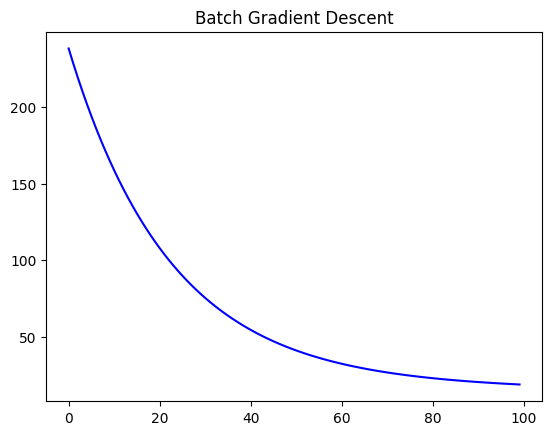

In [9]:
bgd_thetas, bgd_losses = batch_gradient_descent(x_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(bgd_losses), 2))

plt.plot(range(len(bgd_losses)), bgd_losses, color="b")
plt.title("Batch Gradient Descent")
plt.show()

# Exercise 2

In [10]:
df = pd.read_csv('BTC-Daily.csv')
df = df.drop_duplicates()
df


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [11]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


In [12]:
df["close"].describe()

count     2651.000000
mean     11709.326213
std      16282.908704
min        162.000000
25%        654.370000
50%       6407.770000
75%      10726.425000
max      67559.000000
Name: close, dtype: float64

##### Question 4

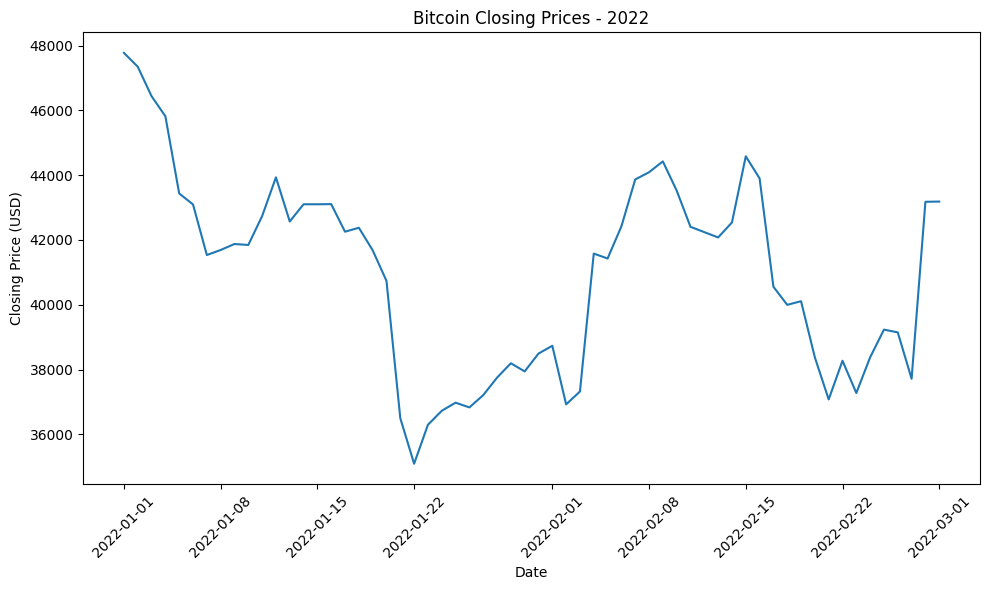

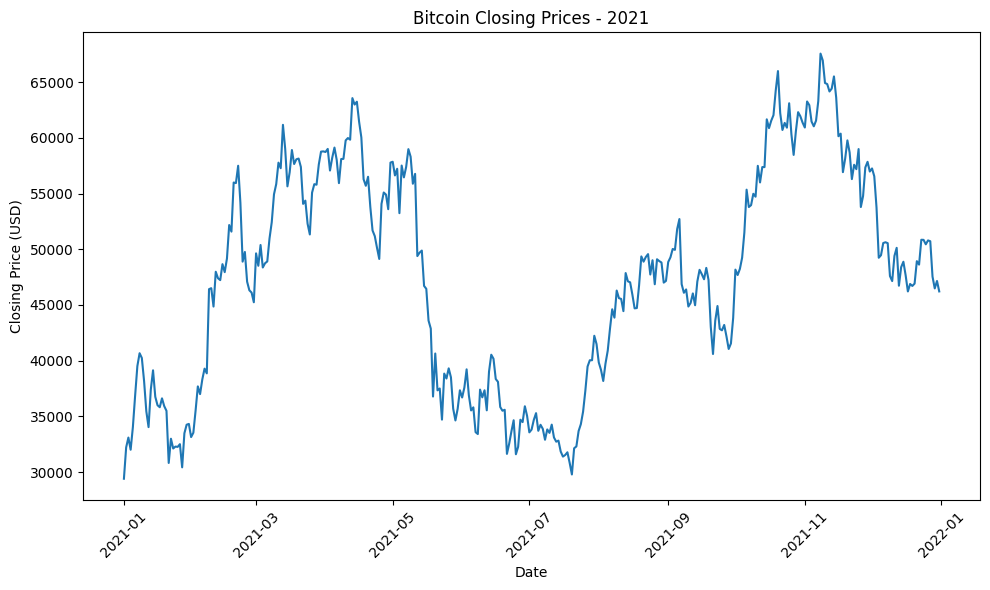

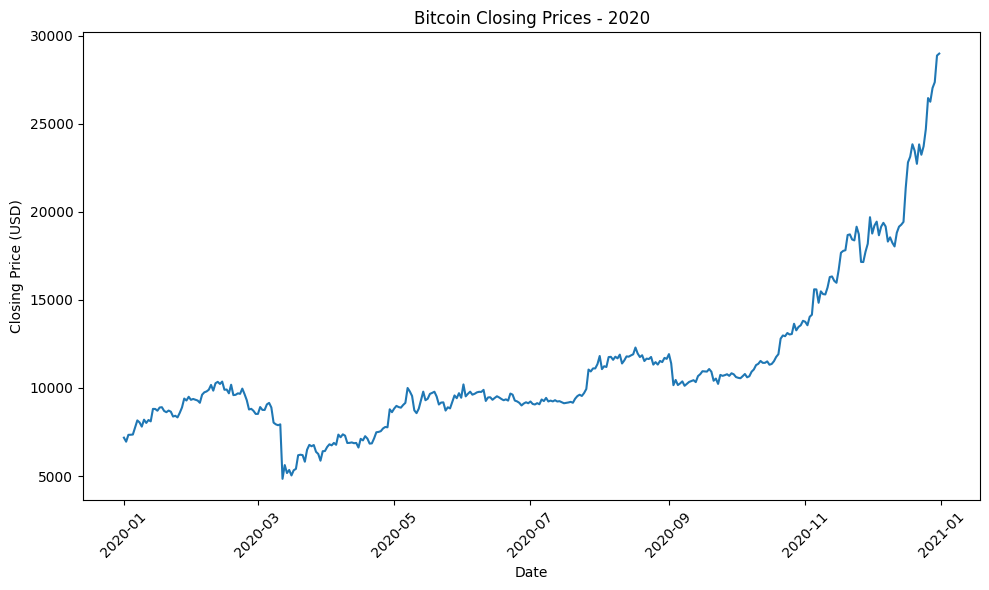

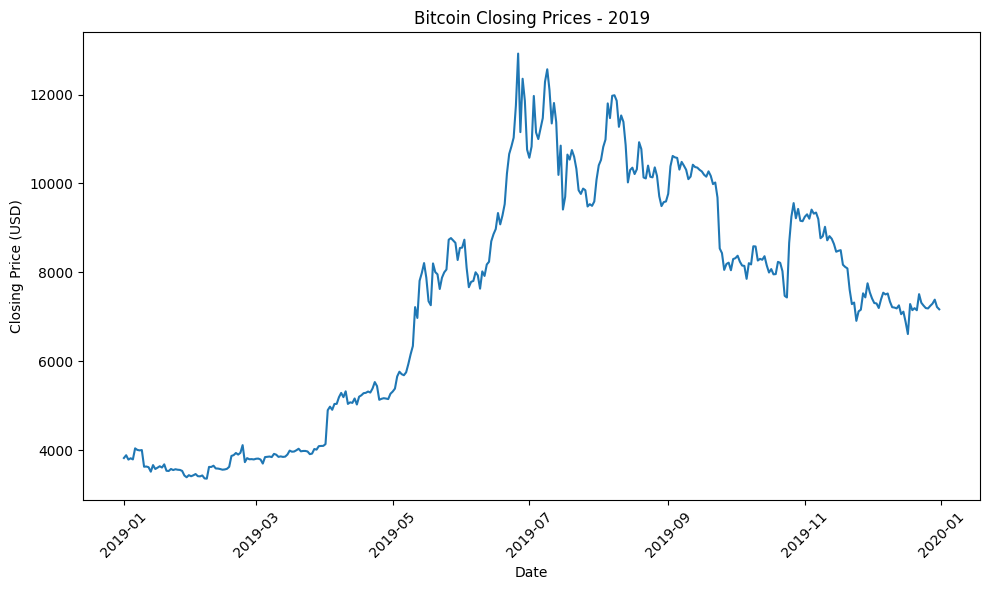

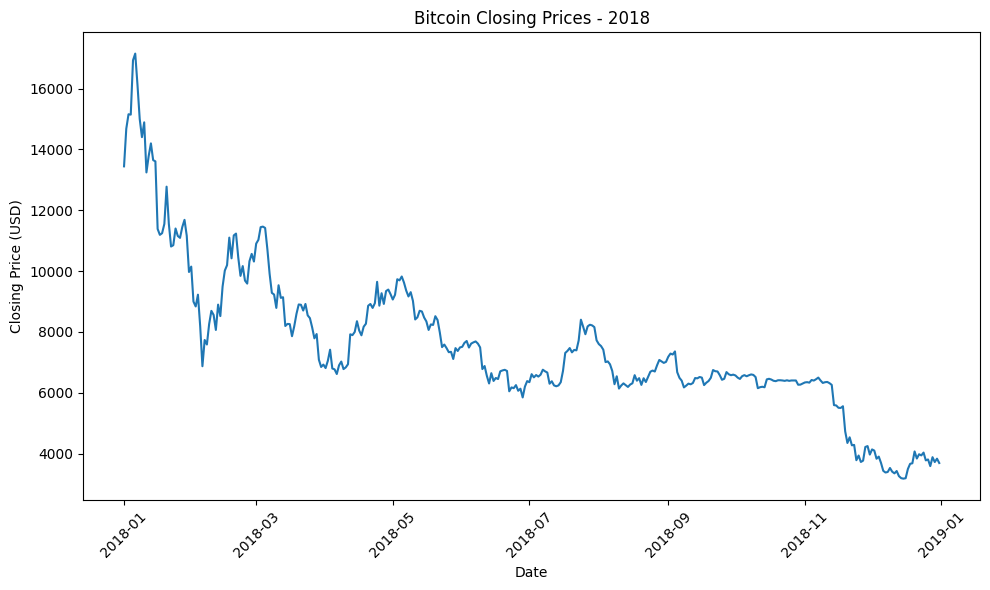

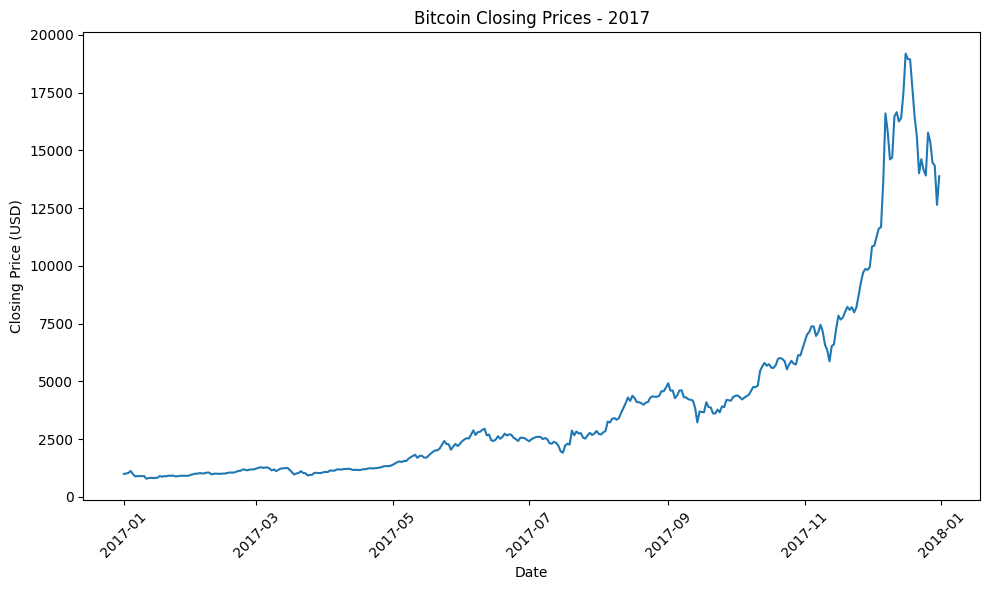

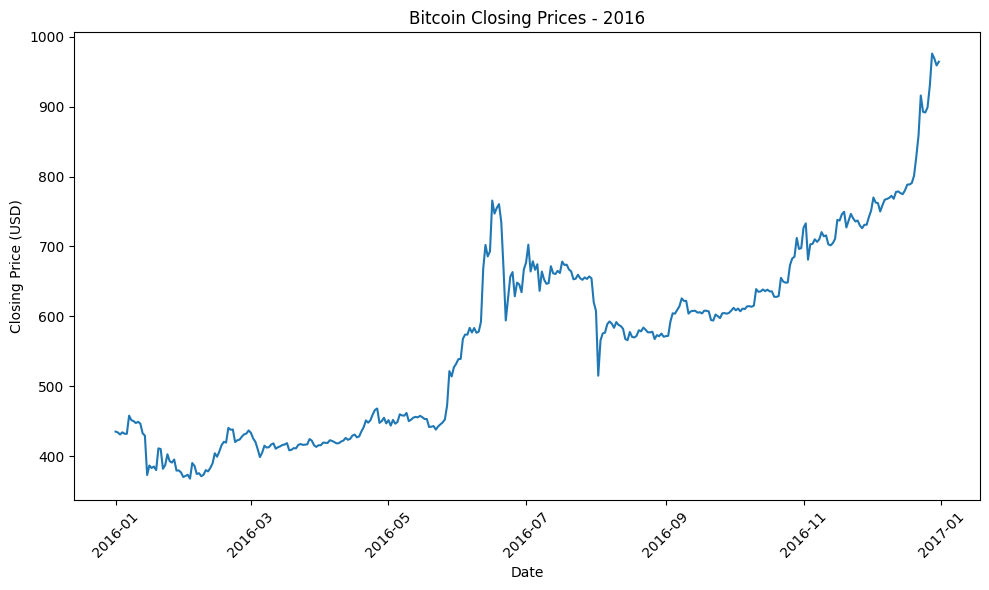

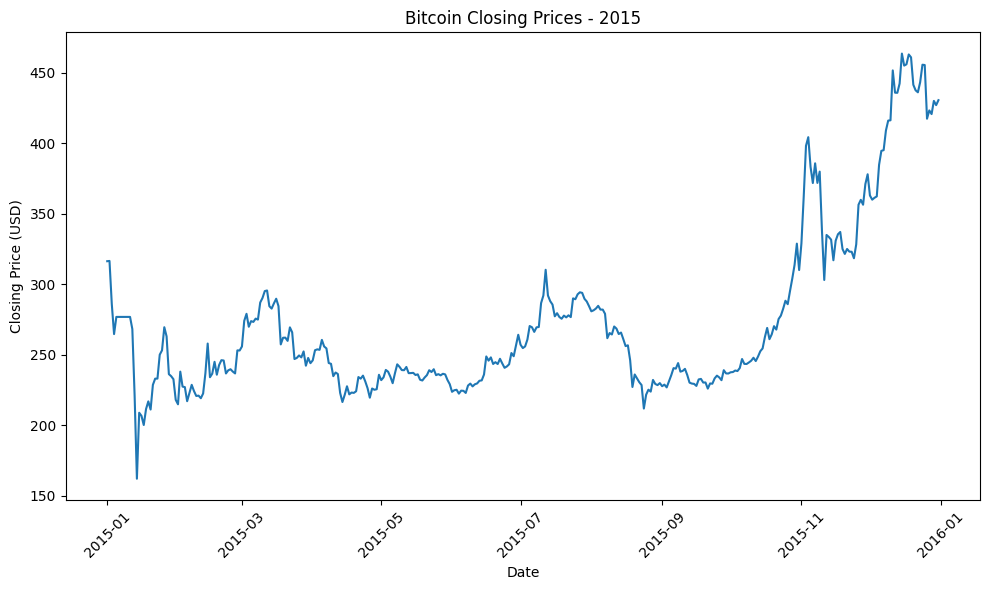

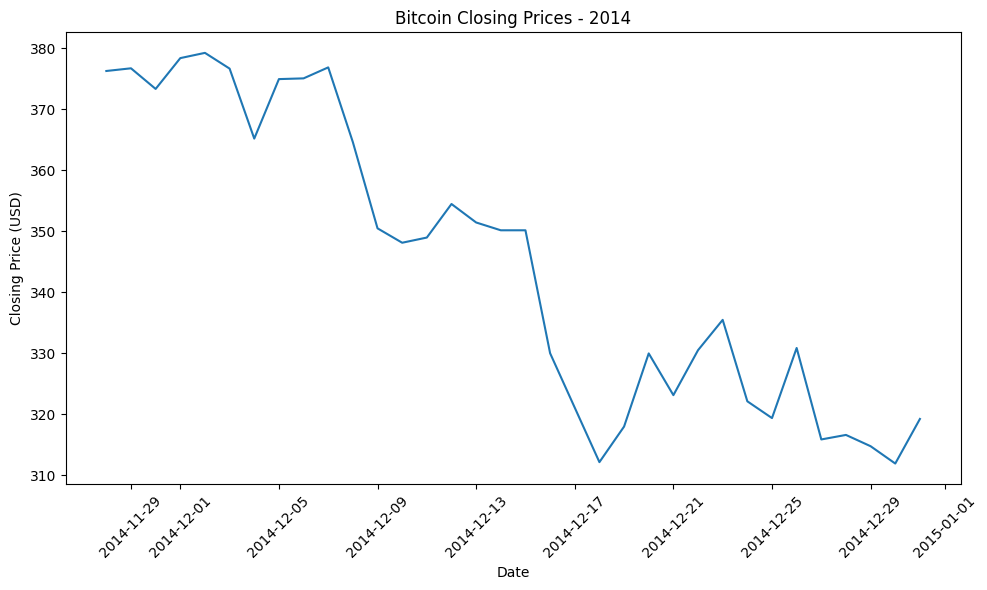

In [13]:
unique_years = df['date'].dt.year.unique()
for year in unique_years:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    df_date_in_year = pd.DataFrame({'date': dates})
    merged_data = pd.merge(df_date_in_year, df, on=['date'], how='left')

    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

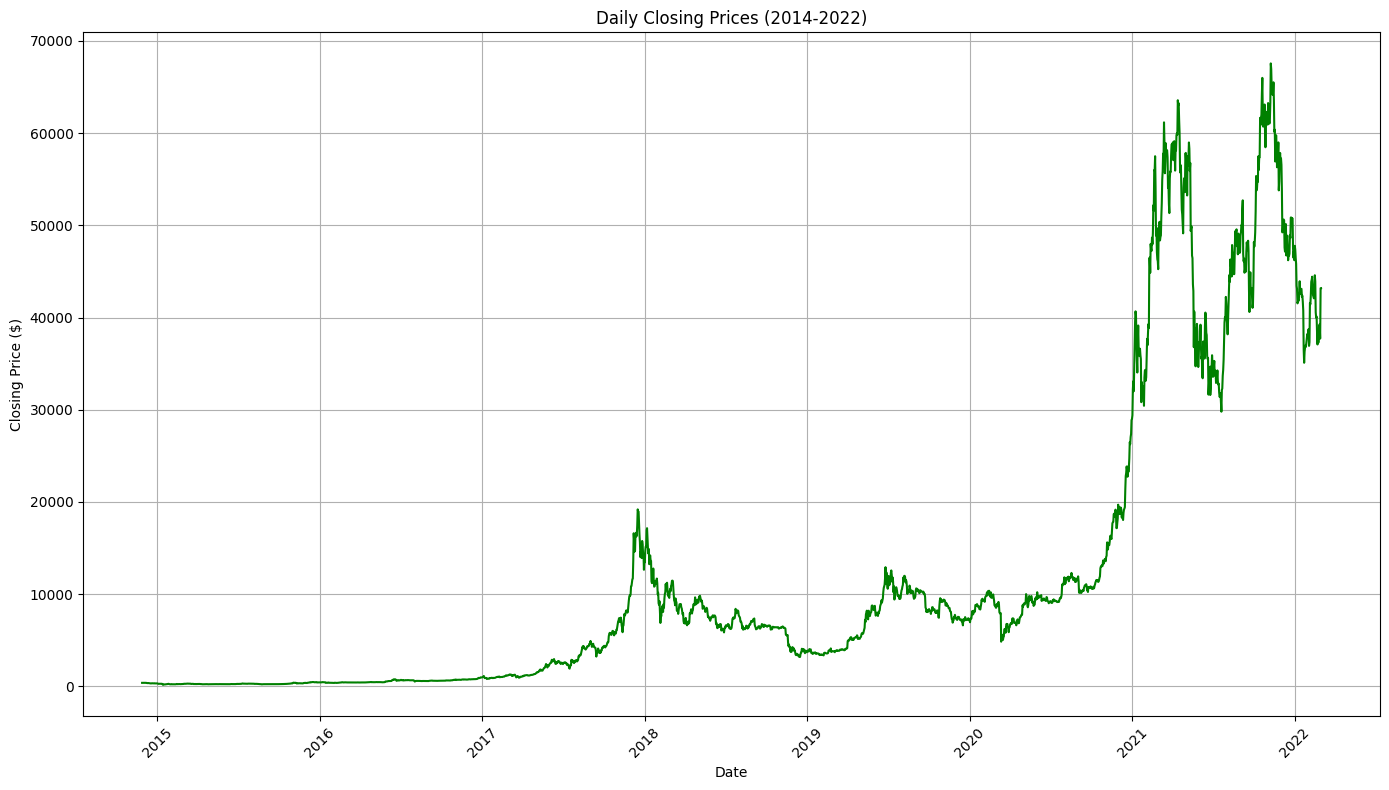

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['close'], linestyle='-', color='g')
plt.title('Daily Closing Prices (2014-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

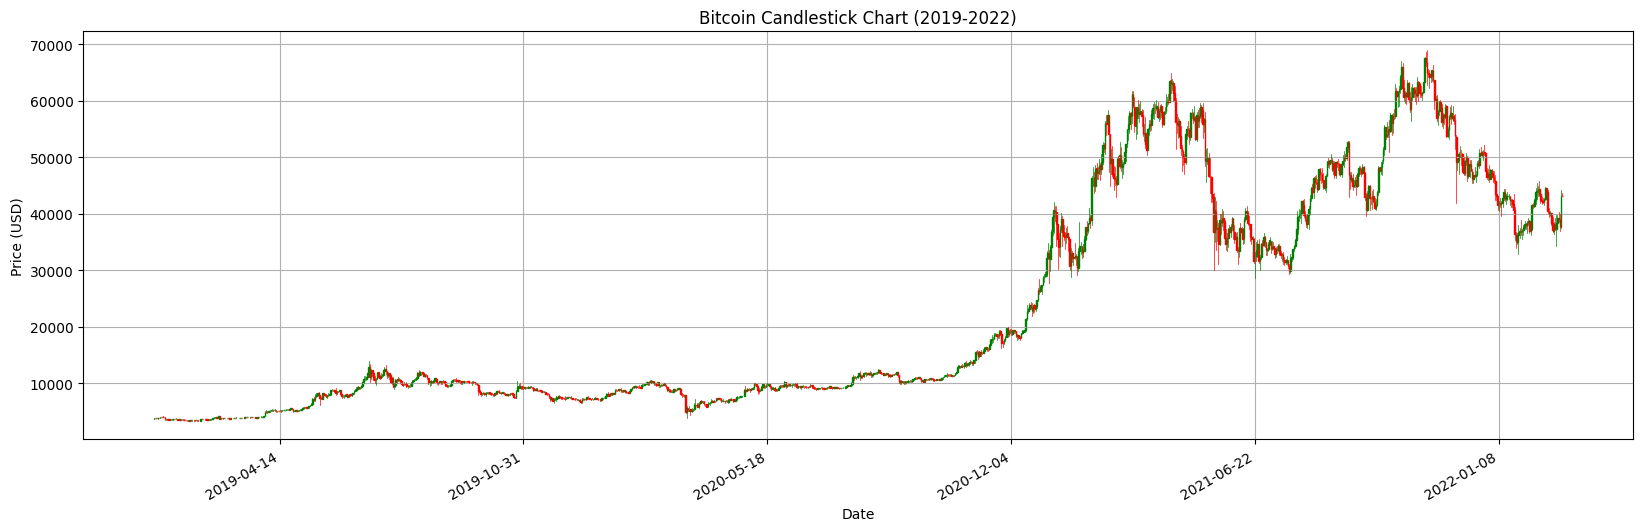

In [15]:
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(20, 6))
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.savefig('bitcoin_candlestick_2019_2022.pdf')
plt.show()


In [16]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [17]:
scalar = StandardScaler()
df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

In [18]:
x = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

##### Question 5, 6, 7, 8

In [19]:
def predict(x, w, b):
  return x.dot(w) + b


def gradient(y_hat, y, x):
    dw = x.T.dot(y_hat - y) / len(y)
    db = np.sum(y_hat - y) / len(y)
    cost = np.sum((y_hat - y) ** 2 / 2) / len(y)
    return (dw, db, cost)


def update_weight(w, b, lr, dw, db):
    w = w - lr*dw
    b = b - lr*db
    return (w, b)


def linear_regression_vectorized(x, y, learning_rate=0.01, num_iterations=200):
  w = np.zeros(x.shape[1])
  b = 0
  losses = []

  for _ in range(num_iterations):
    y_hat = predict(x, w, b)
    dw, db, cost = gradient(y_hat, y, x)
    w, b = update_weight(w, b, learning_rate, dw, db)
    losses.append(cost)

  return w, b, losses


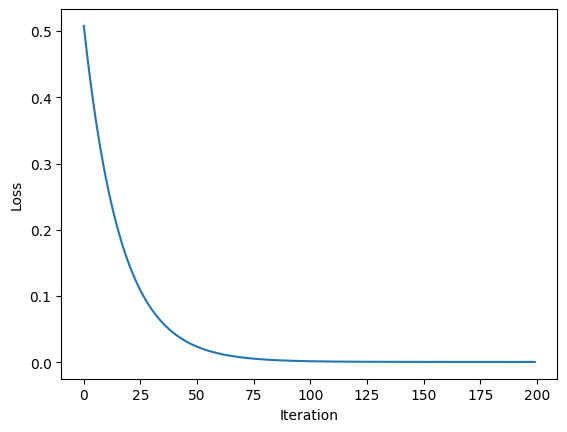

In [20]:
w, b, losses = linear_regression_vectorized(x_train, y_train, learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

##### Question 9

In [22]:
y_train_pred = predict(x_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

y_test_pred = predict(x_test, w, b)
test_accuracy = r2_score(y_test, y_test_pred)

rmse = np.sqrt(np.mean((y_test_pred - y_test) ** 2))
mae = np.mean(np.abs(y_test_pred - y_test))
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991
